#### 참고
    - https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-8-%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%94%A5%EB%9F%AC%EB%8B%9D/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
# 음수기호 표시 안되는거 해결
rcParams["axes.unicode_minus"] = False
import scipy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

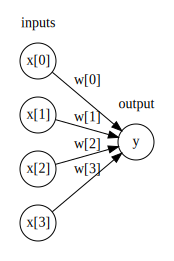

In [2]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
mglearn.plots.plot_logistic_regression_graph()

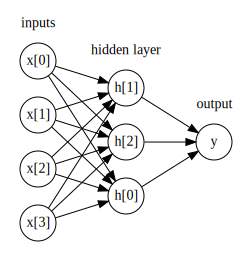

In [3]:
mglearn.plots.plot_single_hidden_layer_graph()

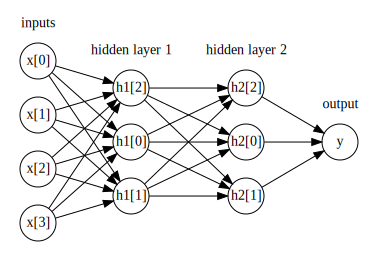

In [4]:
mglearn.plots.plot_two_hidden_layer_graph()

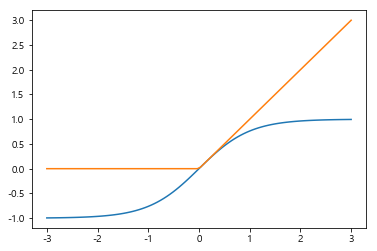

In [6]:
# ReLU, Tanh
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line))   # sigmoid와는 다르게 범위가 -1 ~ +1 까지 이다. (TanH)
plt.plot(line, np.maximum(line, 0))

## 신경망 튜닝

In [7]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier

In [40]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [41]:
mlp = MLPClassifier(solver="lbfgs", random_state=0).fit(X_train, y_train)

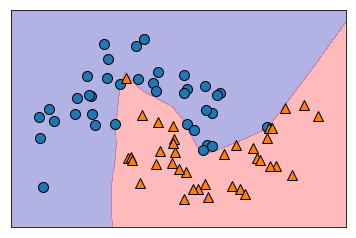

In [42]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [43]:
# 은닉층의 개수를 줄여본다 (기본값: 100개) -> 10
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)

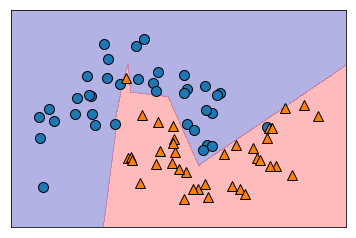

In [44]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [45]:
# 은닉층의 개수를 줄여본다 (기본값: 100개) -> 10개씩 2개로(위 아래 위위 아래)
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)

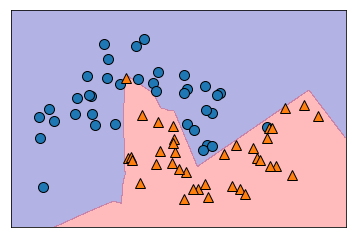

In [46]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [47]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10, 10], activation="tanh").fit(X_train, y_train)

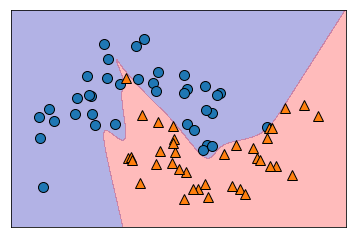

In [48]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)  # 굉장히 자연스러운 곡선, but 그만큼 복잡도가 상승했을 것임

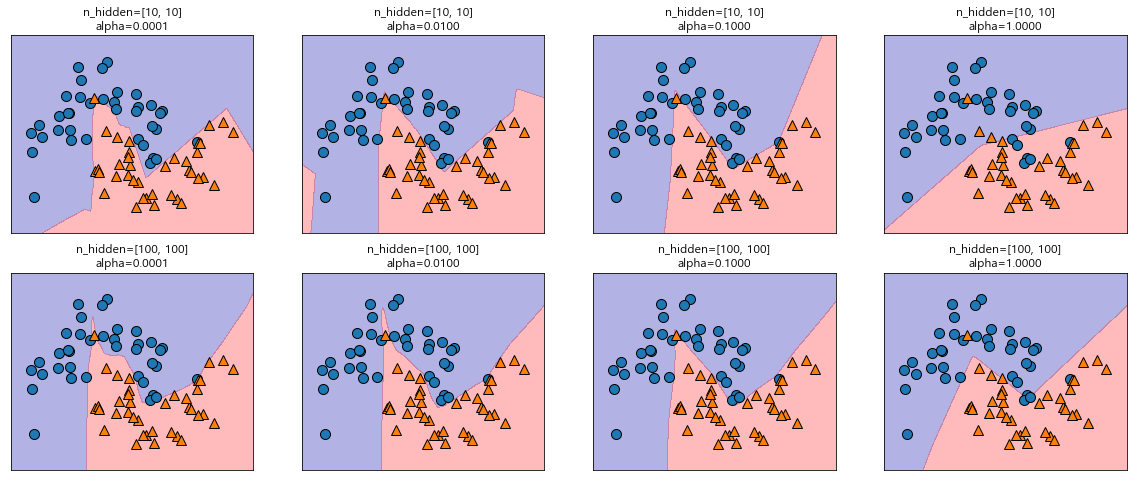

In [51]:
# 복잡도 제어
# alpha = .0001 

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

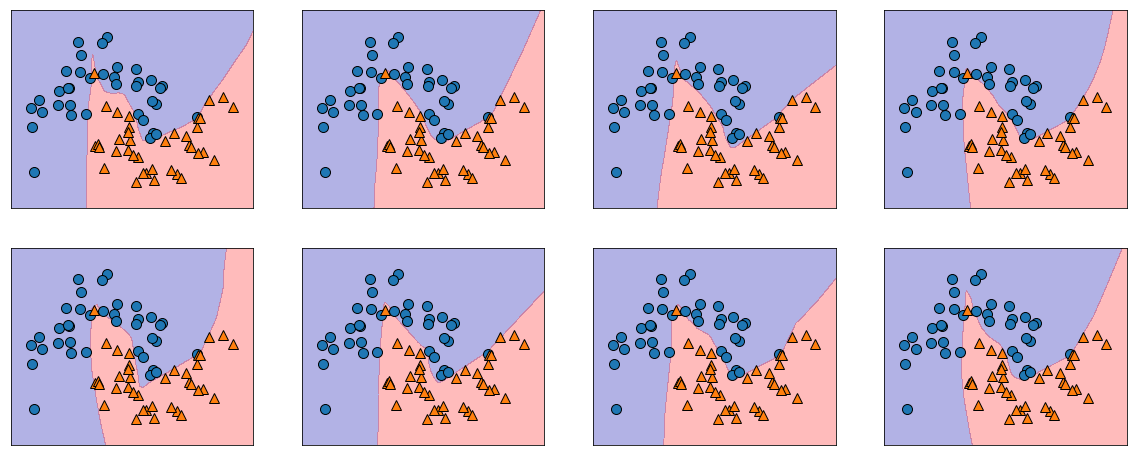

In [23]:
# 참고사항 : dropout

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver="lbfgs", random_state=i, hidden_layer_sizes=[100, 100]).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)  # 각각의 그래프마다 그려야할때 ax=ax
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

## Cancer 데이터를 이용한 다층 퍼셉트론

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [53]:
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)

In [54]:
print("훈련 정확도: {: .2f}".format(mlp.score(X_train, y_train)))  # 0.94
print("테스트 정확도: {: .2f}".format(mlp.score(X_test, y_test)))  # 0.92

훈련 정확도:  0.94
테스트 정확도:  0.92


In [55]:
print("특성별 최대값\n{}".format(cancer.data.max(axis=0)))

특성별 최대값
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [56]:
# scale 조정 : StandardScaler를 이용할 수도 있음 (평균은 0 분산은 1)
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [57]:
mlp = MLPClassifier(random_state=42).fit(X_train_scaled, y_train)
print("훈련 정확도: {: .3f}".format(mlp.score(X_train_scaled, y_train)))  # 0.993
print("테스트 정확도: {: .3f}".format(mlp.score(X_test_scaled, y_test)))  # 0.965

# 경고가 출력되었는데 최대 반복 횟수에 도달했다고 알려주고 있습니다. 이는 모델을 학습시키는 adam 알고리즘에 관련한 것으로 이 경고가 나오면 반복 횟수를 늘려야 합니다. 

훈련 정확도:  0.993
테스트 정확도:  0.965


C:\Users\wjdqh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### 참고: scale 조정을 안해도 되는 알고리즘?  Decision Tree

In [58]:
# 최대 횟수를 늘리기
mlp = MLPClassifier(random_state=0, max_iter=1000).fit(X_train_scaled, y_train)  # 초기값 조정
print("훈련 정확도: {: .3f}".format(mlp.score(X_train_scaled, y_train)))  # 1.000
print("테스트 정확도: {: .3f}".format(mlp.score(X_test_scaled, y_test)))  # 0.972

훈련 정확도:  1.000
테스트 정확도:  0.972


In [59]:
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1, solver='lbfgs').fit(X_train_scaled, y_train)
# alpha=1 으로 훈련데이터 과적합부분 다소 해소
print("훈련 정확도: {: .3f}".format(mlp.score(X_train_scaled, y_train)))  # 0.988
print("테스트 정확도: {: .3f}".format(mlp.score(X_test_scaled, y_test)))  # 0.972

훈련 정확도:  0.988
테스트 정확도:  0.972


#### * Adam(Adaptive Moment Estimation) 알고리즘은 경사 하강법의 학습률learning rate 매개변수를 학습이 반복됨에 따라 조정해가는 알고리즘 중 하나입니다. MLPClassifier와 MLPRegressor의 solver 매개변수 기본값이 adam이고 max_iter 매개변수의 기본값은 200입니다.